In [2]:
import pandas as pd
import re
from textstat.textstat import textstat
from textblob import TextBlob
import seaborn as sns
%matplotlib inline
sns.set_style("dark")
sns.set_context("talk")

In [4]:
df = pd.read_csv('../data/twitter-hate-speech.csv', encoding='latin-1')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,does_this_tweet_contain_hate_speech,does_this_tweet_contain_hate_speech:confidence,_created_at,orig__golden,orig__last_judgment_at,orig__trusted_judgments,orig__unit_id,orig__unit_state,_updated_at,orig_does_this_tweet_contain_hate_speech,does_this_tweet_contain_hate_speech_gold,does_this_tweet_contain_hate_speech_gold_reason,does_this_tweet_contain_hate_speechconfidence,tweet_id,tweet_text
0,853718217,True,golden,86,NaN,The tweet uses offensive language but not hate...,0.6013,NaN,True,NaN,0.0,615561535.0,golden,NaN,The tweet contains hate speech,The tweet contains hate speech\nThe tweet uses...,NaN,1.0,1.666196e+09,Warning: penny boards will make you a faggot
1,853718218,True,golden,92,NaN,The tweet contains hate speech,0.7227,NaN,True,NaN,0.0,615561723.0,golden,NaN,The tweet contains hate speech,The tweet contains hate speech\nThe tweet uses...,NaN,1.0,4.295121e+08,Fuck dykes
2,853718219,True,golden,86,NaN,The tweet contains hate speech,0.5229,NaN,True,NaN,0.0,615562039.0,golden,NaN,The tweet contains hate speech,The tweet contains hate speech\nThe tweet uses...,NaN,1.0,3.956238e+08,@sizzurp__ @ILIKECATS74 @yoPapi_chulo @brandon...
3,853718220,True,golden,98,NaN,The tweet contains hate speech,0.5184,NaN,True,NaN,0.0,615562068.0,golden,NaN,The tweet contains hate speech,The tweet contains hate speech\nThe tweet uses...,NaN,1.0,4.975147e+08,"""@jayswaggkillah: ""@JacklynAnnn: @jayswaggkill..."
4,853718221,True,golden,88,NaN,The tweet uses offensive language but not hate...,0.5185,NaN,True,NaN,0.0,615562488.0,golden,NaN,The tweet contains hate speech,The tweet contains hate speech\nThe tweet uses...,NaN,1.0,5.889236e+08,@Zhugstubble You heard me bitch but any way I'...


In [5]:
df.describe()

,_unit_id,_trusted_judgments,does_this_tweet_contain_hate_speech:confidence,_created_at,orig__last_judgment_at,orig__trusted_judgments,orig__unit_id,_updated_at,does_this_tweet_contain_hate_speech_gold_reason,does_this_tweet_contain_hate_speechconfidence,tweet_id
count,1.450900e+04,14509.000000,14509.000000,0.0,0.0,67.0,6.700000e+01,0.0,0.0,67.0,1.450900e+04
mean,8.537266e+08,3.406989,0.865844,NaN,NaN,0.0,6.155623e+08,NaN,NaN,1.0,6.762014e+17
std,4.205642e+03,5.979699,0.178734,NaN,NaN,0.0,1.089591e+03,NaN,NaN,0.0,4.606417e+16
min,8.537182e+08,3.000000,0.333300,NaN,NaN,0.0,6.155611e+08,NaN,NaN,1.0,2.423319e+07
25%,8.537230e+08,3.000000,0.668400,NaN,NaN,0.0,6.155612e+08,NaN,NaN,1.0,6.790000e+17
50%,8.537266e+08,3.000000,1.000000,NaN,NaN,0.0,6.155622e+08,NaN,NaN,1.0,6.790000e+17
75%,8.537303e+08,3.000000,1.000000,NaN,NaN,0.0,6.155625e+08,NaN,NaN,1.0,6.800000e+17
max,8.537339e+08,98.000000,1.000000,NaN,NaN,0.0,6.155658e+08,NaN,NaN,1.0,6.800000e+17


In [6]:
data_path = '../data/twitter-hate-speech.csv'

df = pd.read_csv(data_path, encoding='latin1')
df = df.rename(columns={'does_this_tweet_contain_hate_speech': 'label',  
                        'does_this_tweet_contain_hate_speech:confidence': 'confidence' })

mapping = {'The tweet is not offensive': 'Not offensive', 
           'The tweet uses offensive language but not hate speech': 'Offensive',
           'The tweet contains hate speech': 'Hate speech'
          }
df['label'] = df['label'].map(lambda x: mapping[x])

In [7]:
text = df['tweet_text']

In [8]:
text[:10]

0         Warning: penny boards will make you a faggot
1                                           Fuck dykes
2    @sizzurp__ @ILIKECATS74 @yoPapi_chulo @brandon...
3    "@jayswaggkillah: "@JacklynAnnn: @jayswaggkill...
4    @Zhugstubble You heard me bitch but any way I'...
5    @elaynay your a dirty terrorist and your relig...
6    RT @ivanrabago_: @_WhitePonyJr_ looking like f...
7    Well I thought you knew actually RT @KingHorse...
8         @Stonisnipezz I know. It was a joke, faggot.
9    I'm tired of people saying I look like my brot...
Name: tweet_text, dtype: object

In [9]:
text[:10]
def remove_handles(content):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)"," ",content).split())

In [10]:
text.apply(remove_handles)[:10]

0         Warning: penny boards will make you a faggot
1                                           Fuck dykes
2    __ _chulo at least i dont look like jefree sta...
3             " : " : Is a fag" jackie jealous" Neeeee
4    You heard me bitch but any way I'm back th tex...
5    your a dirty terrorist and your religion is a ...
6           RT _: @_WhitePonyJr_ looking like faggots?
7    Well I thought you knew actually RT : Man why ...
8                       I know. It was a joke, faggot.
9    I'm tired of people saying I look like my brot...
Name: tweet_text, dtype: object

In [11]:
data = df[~df['_golden']].dropna(axis=1)

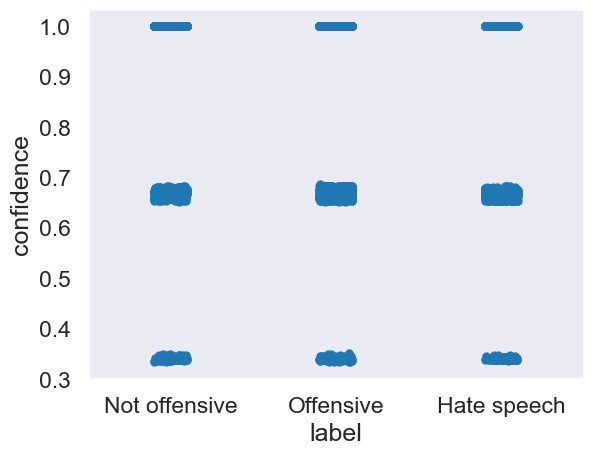

In [12]:
sns.stripplot(x="label", y="confidence", data=data, size=6, jitter=True);

In [13]:
data['label'].value_counts()

label
Not offensive    7253
Offensive        4807
Hate speech      2382
Name: count, dtype: int64

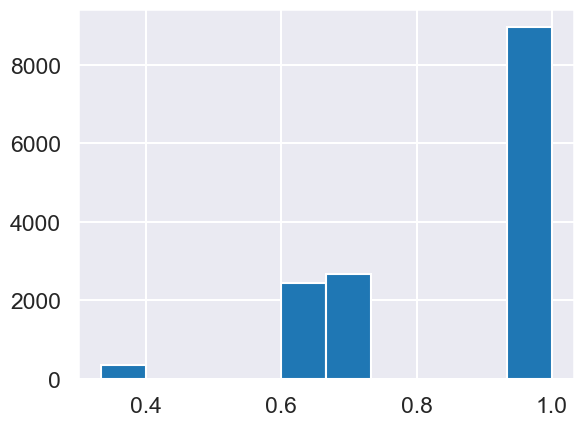

In [14]:
data['confidence'].hist(bins=10);